In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array(
    [
        [3.3],
        [4.4],
        [5.5],
        [6.71],
        [6.93],
        [4.168],
        [9.779],
        [6.182],
        [7.59],
        [2.167],
        [7.042],
        [10.791],
        [5.313],
        [7.997],
        [3.1],
    ],
    dtype=np.float32,
)

y_train = np.array(
    [
        [1.7],
        [2.76],
        [2.09],
        [3.19],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53],
        [1.221],
        [2.827],
        [3.465],
        [1.65],
        [2.904],
        [1.3],
    ],
    dtype=np.float32,
)

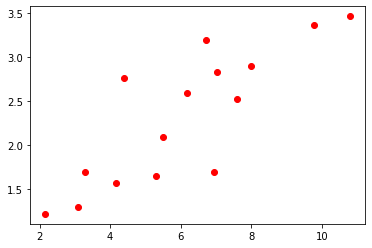

In [3]:
plt.plot(x_train, y_train, "ro", label="Original Data")
plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

In [6]:
print("requires_grad for X_train = ", X_train.requires_grad)
print("requires_grad for Y_train = ", Y_train.requires_grad)

requires_grad for X_train =  False
requires_grad for Y_train =  False


In [7]:
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 1e-6

In [8]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 100])

In [9]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True)
w2.shape

torch.Size([100, 1])

In [10]:
for iter in range(1, 301):
    y_pred = X_train.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()

    if iter % 50 == 0:
        print(iter, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 2091.739501953125
100 38.391990661621094
150 4.279866695404053
200 3.644700765609741
250 3.632849931716919
300 3.6326284408569336


In [11]:
print("w1: ", w1)
print("w2: ", w2)

w1:  tensor([[ 1.0086e+00,  4.0278e-01,  5.4134e-02,  2.9683e-01,  6.2412e-01,
          7.6386e-01,  6.5860e-01,  8.7927e-01,  2.7435e-01,  5.0753e-01,
          5.3897e-01,  4.3815e-01,  4.7882e-01, -1.5295e-03,  1.3556e-01,
          5.6384e-01, -3.8621e-03,  2.4028e-01,  1.2659e-01,  4.8908e-02,
          8.6239e-01, -1.1469e-04, -2.3753e-03,  9.0492e-01,  5.5954e-01,
          4.6735e-02,  6.6293e-01,  1.0772e+00, -1.5418e-03,  1.5809e-01,
         -4.3277e-03,  3.4122e-01,  8.1021e-01,  6.0448e-01, -2.2417e-03,
          2.5215e-01,  4.2331e-01,  7.5220e-02,  7.9227e-01,  3.6930e-01,
          2.1192e-01, -2.3365e-04, -1.3680e-03, -7.6475e-05,  8.6733e-01,
          6.1125e-02,  1.6860e-01,  4.6935e-01,  3.6341e-01, -2.5410e-03,
          7.3376e-01, -1.1758e-02,  3.0043e-01,  1.3248e-01, -2.8688e-04,
          1.8450e-01,  6.5308e-01,  3.1015e-01,  4.8610e-01, -1.2118e-02,
         -5.6494e-04,  2.7469e-01,  4.2121e-01,  9.5171e-01,  4.2119e-01,
          7.3531e-01, -1.0096e-02

In [12]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [13]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2117],
        [1.6157],
        [2.0196],
        [2.4639],
        [2.5447],
        [1.5305],
        [3.5908],
        [2.2700],
        [2.7870],
        [0.7957],
        [2.5858],
        [3.9624],
        [1.9509],
        [2.9365],
        [1.1383]], grad_fn=<MmBackward0>)

In [14]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.2117426],
       [1.6156578],
       [2.0195713],
       [2.4638765],
       [2.5446596],
       [1.5304677],
       [3.590797 ],
       [2.269998 ],
       [2.7870064],
       [0.7957109],
       [2.5857844],
       [3.9624   ],
       [1.9509058],
       [2.9364557],
       [1.1383034]], dtype=float32)

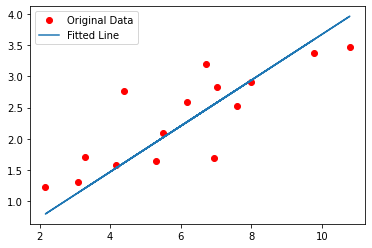

In [16]:
plt.plot(x_train, y_train, "ro", label="Original Data")

plt.plot(x_train, predicted, label="Fitted Line")

plt.legend()

plt.show()